# STA 141B: Homework 2
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Rick 

Last Name: Alarcon Sisniegas

Student ID: 914314280

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [21]:
from PIL import Image


# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0

cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

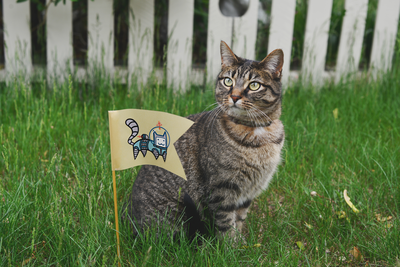

In [22]:
cat_img


In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [23]:
import numpy as np

cat = np.array(cat_img)
type(cat)


numpy.ndarray

To convert an array back to an image (for display) use the function below:

In [24]:
def as_image(x):
    """Convert an ndarray to an Image.
    Args:
        x (ndarray): The array of pixels. 
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [25]:
#the number of axes (dimensions) of the array,the number of dimensions is referred to as rank
# Each dimension x,y,z represent the 3D color distribution RGB
cat.ndim

3

In [26]:
#This is a tuple of integers indicating the size of the array in each dimension
cat.shape

(267, 400, 3)

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

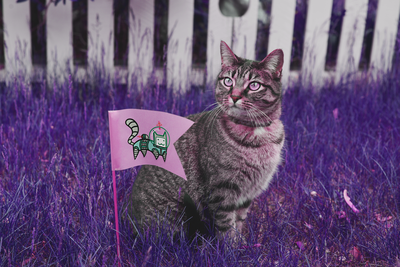

In [27]:
#  the create copys for green and blue and then 
#plot it back to the imagen
cat_copy=cat.copy()
green = cat_copy[:,:,1].copy()
blue  = cat_copy[:,:,2].copy()
cat_copy[:,:,2] = green
cat_copy[:,:,1] = blue

as_image(cat_copy)
#copy_cat = cat.copy

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

The copy is needed so we can change one copy without changing the other.
.copy() give as a shallow copy of cat, which mean that it creates a object and then insert in that object that present the original imagen.


__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

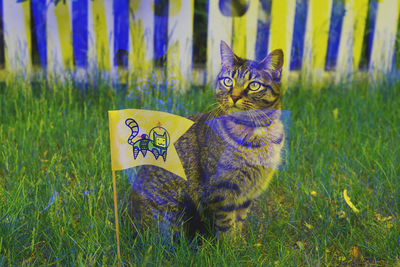

In [28]:
cat_copy2 = cat.copy()
cat_copy2[:,:,2] = cat_copy2[:,::-1,2]
as_image(cat_copy2)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [29]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [30]:
# I create a function that output 
def fun(x,q):
    u, d, vt = np.linalg.svd(x)
   # d[-1: :1]  =0
    v_q = vt.T[:,:q]
    vqt=v_q.T
    xvq= x@(v_q)
    return (xvq,vqt)
    

In [31]:
# Function approx the original one and generate a result
def approx (xvq,vqt):
    result = xvq@vqt
    return result
    
    

In [32]:
#testing solutions
#testing on the red channel

redcat  = cat[:,:,0]
xvq, vqt= fun(redcat,10)
aprox   =  approx(xvq,vqt)
redcat  = aprox


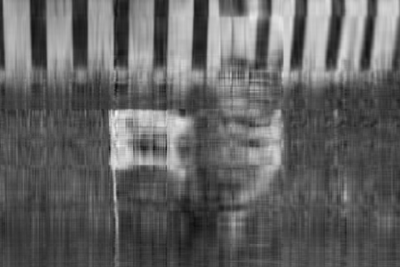

In [33]:
#plotting the imagen, only one channel
as_image(redcat)

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [38]:
#We get the number of bytes in redcat and print it 
redcatbytes =(redcat).nbytes
print(str(redcatbytes) + "number of bytes in redcat")

compre_version = xvq.nbytes + vqt.nbytes
print(str(compre_version) + "number of bytes in the image that is compressed.")

comparison = compre_version/redcatbytes
print(comparison)

print(" the file is kept by 6%. the original is much larger than the Compressed. when keeping the imagen, number of byted are reduced")

854400number of bytes in redcat
53360number of bytes in the image that is compressed.
0.062453183520599254
 the file is kept by 6%. the original is much larger than the Compressed. when keeping the imagen, number of byted are reduced


In [39]:
redcat.dtype

dtype('float64')

## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [40]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)


[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [41]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef,x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [42]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [44]:
def FFT_img(X,q):
#function return coeficent and dimension. 
    dimension =X.shape 
    coeficient = np.fft.rfft2(X)
    coeficient[q:,q:] = 0
    
    return coeficient,dimension

    

In [45]:
def FFT_approx(coeficient,dimension):
    # approximate the fft of the original
    output =  np.fft.irfft2(coeficient,dimension)
    
    return output
    
    
    

In [46]:
FFT_img(x,1)

(array([[ 11.+0.j,  -1.+0.j],
        [ -1.+0.j,   0.+0.j]]), (2, 3))

In [47]:
a,b = FFT_img(x,1)
FFT_approx(a,b)

array([[ 1.33333333,  1.83333333,  1.83333333],
       [ 1.66666667,  2.16666667,  2.16666667]])

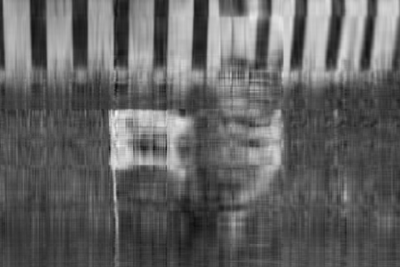

In [48]:

fftred = cat[:,:,0]
a,b = FFT_img(redcat,250)
approx = FFT_approx(a,b)
fftred = approx
as_image(fftred)

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [49]:
#print(xvq.shape)
#print(vqt.shape)
#print(y_coef.shape)

In [51]:
#we get the number of bytes and the image clarity
ff_bytes = fftred.nbytes
ff_bytes
#we the 854400 bytes and we get the imagen out 

854400

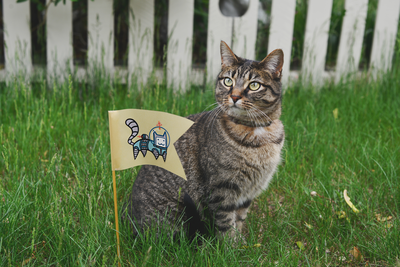

In [56]:
as_image(cat)